In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
lb = LabelEncoder()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.describe

<bound method NDFrame.describe of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  cam

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
print(df[['age', 'job', 'balance', 'housing', 'loan', 'deposit']].describe())

                age       balance
count  11162.000000  11162.000000
mean      41.231948   1528.538524
std       11.913369   3225.413326
min       18.000000  -6847.000000
25%       32.000000    122.000000
50%       39.000000    550.000000
75%       49.000000   1708.000000
max       95.000000  81204.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

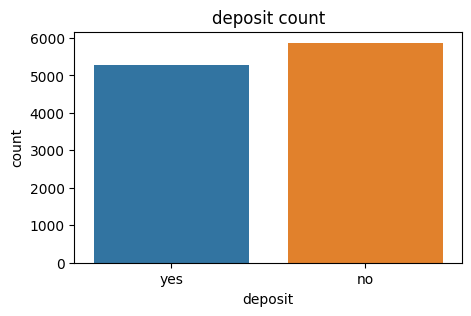

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='deposit')
plt.title('deposit count')
plt.show()

In [ ]:
print(df['marital'].value_counts())

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


In [ ]:
marital_deposit = pd.crosstab(df['marital'], df['deposit'])
print(marital_deposit)

deposit     no   yes
marital             
divorced   671   622
married   3596  2755
single    1606  1912


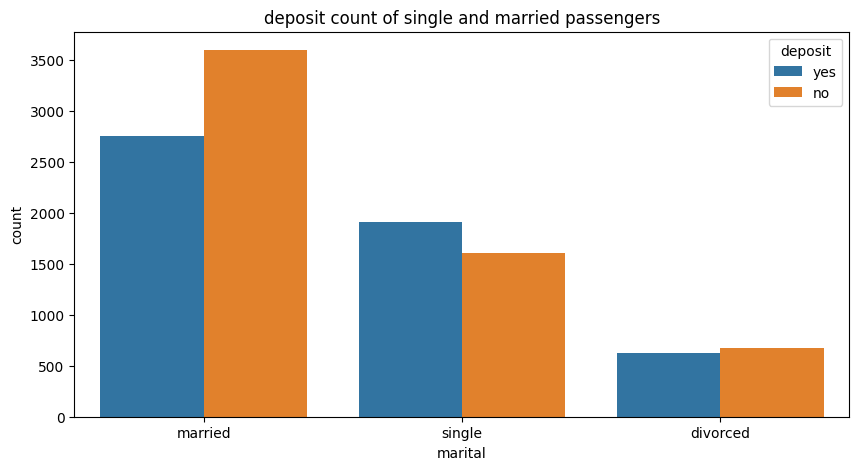

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='marital', hue='deposit')
plt.title('deposit count of single and married passengers')
plt.show()

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


lb=LabelEncoder()
for i in df:
  df[i] = lb.fit_transform(df[i])

In [ ]:
x = df.drop(['deposit'],axis = 1)
y = df['deposit']

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0


In [ ]:
y


0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0


In [ ]:
print(x)
print(y)
x.describe()

       age  job  marital  education  default  balance  housing  loan  contact  \
0       41    0        1          1        0     2288        1     0        2   
1       38    0        1          1        0      469        0     0        2   
2       23    9        1          1        0     1618        1     0        2   
3       37    7        1          1        0     2356        1     0        2   
4       36    0        1          2        0      608        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   15    1        2          0        0      425        1     0        0   
11158   21    7        1          1        0     1149        0     0        2   
11159   14    9        2          1        0      453        0     0        0   
11160   25    9        1          1        0      424        0     1        0   
11161   16    9        1          1        0      424        0     0        0   

       day  month  duration

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,23.231410,4.487905,1.199337,1.285164,0.015051,1327.318043,0.473123,0.130801,0.489697,14.658036,5.445709,359.711521,1.503942,46.133668,0.824673,2.477782
std,11.911048,3.225132,0.625552,0.749478,0.121761,965.056807,0.499299,0.337198,0.818724,8.420740,3.191939,308.647769,2.652133,95.289292,2.156619,1.002952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,1.000000,0.000000,546.000000,0.000000,0.000000,0.000000,7.000000,3.000000,136.000000,0.000000,0.000000,0.000000,2.000000
50%,21.000000,4.000000,1.000000,1.000000,0.000000,973.000000,0.000000,0.000000,0.000000,14.000000,6.000000,253.000000,1.000000,0.000000,0.000000,3.000000
75%,31.000000,7.000000,2.000000,2.000000,0.000000,1928.000000,1.000000,0.000000,1.000000,21.000000,8.000000,494.000000,2.000000,14.750000,1.000000,3.000000
max,75.000000,11.000000,2.000000,3.000000,1.000000,3804.000000,1.000000,1.000000,2.000000,30.000000,11.000000,1427.000000,35.000000,471.000000,33.000000,3.000000


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors = 5,p=1)#manhattan
clf2 = KNeighborsClassifier(n_neighbors = 10,p=2)#euclidean

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cm2 = confusion_matrix(y_test,pred2)

In [ ]:
print(cm1)

[[897 269]
 [289 778]]


In [ ]:
print(cm2)

[[938 228]
 [313 754]]


In [ ]:
cl1 = classification_report(y_test,pred1)
cl2 = classification_report(y_test,pred2)

In [ ]:
print(cl1)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1166
           1       0.74      0.73      0.74      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



In [ ]:
print(cl2)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1166
           1       0.77      0.71      0.74      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [ ]:
new_df = df.drop(['deposit'],axis =1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3


In [ ]:
new_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['job'] = lb.fit_transform(new_df['job'])
lb2 = LabelEncoder()
new_df['marital'] = lb2.fit_transform(new_df['marital'])
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0


In [ ]:
new_df['job'] = new_df['job'].fillna(np.mean(new_df['job']))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [ ]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

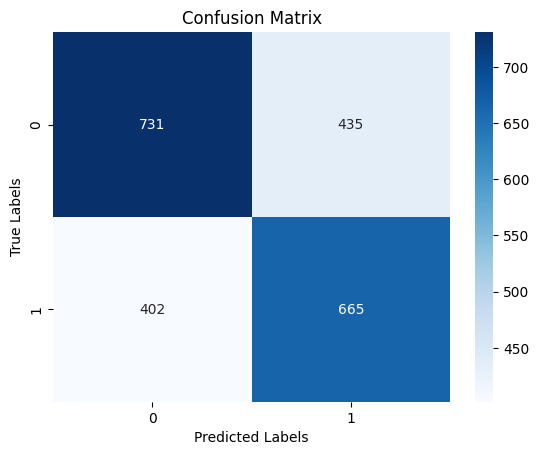

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

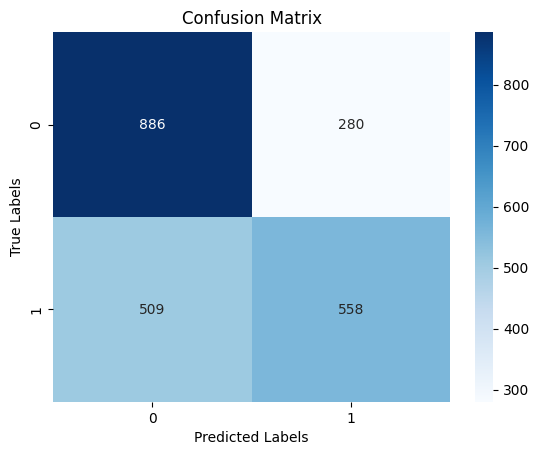

In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr1)

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1166
           1       0.60      0.62      0.61      1067

    accuracy                           0.63      2233
   macro avg       0.62      0.63      0.62      2233
weighted avg       0.63      0.63      0.63      2233



In [ ]:
print(cr2)

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      1166
           1       0.67      0.52      0.59      1067

    accuracy                           0.65      2233
   macro avg       0.65      0.64      0.64      2233
weighted avg       0.65      0.65      0.64      2233

